# 1 Regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

df = pd.read_csv('Hitters.csv')

# Drop null and the first name column
df = df.dropna().drop(df.columns[[0]], axis=1)
y = df['Salary']
# Drop the categorical predictors
x = df.drop(['Salary','League', 'Division', 'NewLeague'], axis=1).astype('float64')
x.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [2]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=123)

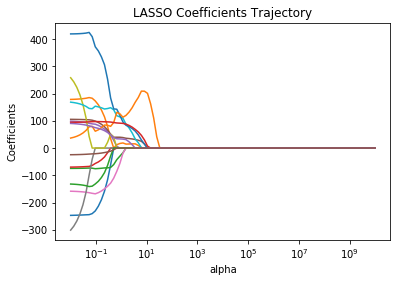

In [3]:
# 1.1.1. Create a visualization of the coefficient trajectories
alphas = 10 ** np.linspace(10, -2, 100) 

Lasso_coefs = []
for a in alphas:
    lassoreg = Lasso(alpha=a,normalize=True, max_iter=1e5)
    lassoreg.fit(scale(X_train), y_train)
    Lasso_coefs.append(lassoreg.coef_)

ax = plt.gca()
ax.plot(alphas, Lasso_coefs)
ax.set_xscale('log')

plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('LASSO Coefficients Trajectory')
plt.axis('tight')
plt.show()

In [4]:
# 1.1.2. Comment on which are the final three predictors that remain in the model
coef = Lasso(alpha= 10**(1), normalize = True, max_iter=1e5).fit(x, y).coef_
x.columns[abs(coef) != 0]

Index(['Hits', 'CRuns', 'CRBI'], dtype='object')

'Hits', 'CRuns' and 'CRBI' are the final three predictors that remain in the model. 

In [5]:
# 1.1.3. Use cross-validation to find the optimal value of the regularization penalty
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 1e5, normalize = True)
lassocv.fit(X_train, y_train)
print("The optimal value of the regularization penalty is:", lassocv.alpha_)

The optimal value of the regularization penalty is: 0.655653238698


In [6]:
#1.1.4. How many predictors are left in that model?
lasso = Lasso(alpha=lassocv.alpha_,normalize=True, max_iter=50000)
lasso.fit(X_train, y_train)
mse = mean_squared_error(y_test, lasso.predict(X_test))
print(pd.Series(lasso.coef_, index=x.columns))
print("")
print("There are", x.shape[1]-lasso.coef_.tolist().count(0),"predictors left in that model.")

AtBat      -0.000000
Hits        0.276771
HmRun      -4.902551
Runs       -0.000000
RBI         0.267358
Walks       1.829353
Years     -18.671847
CAtBat      0.000000
CHits       0.000000
CHmRun      1.461752
CRuns       0.447574
CRBI        0.400491
CWalks     -0.000000
PutOuts     0.332007
Assists     0.222621
Errors     -0.000000
dtype: float64

There are 10 predictors left in that model.


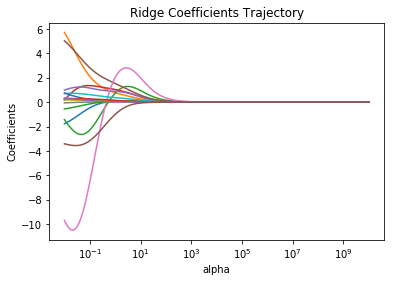

In [7]:
# 1.2.1 Visualize the coefficient trajectories
ridge_coefs = []
for a in alphas:
    ridgereg = Ridge(alpha=a,normalize=True)
    ridgereg.fit(x,y)
    ridge_coefs.append(ridgereg.coef_)

ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')

plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients Trajectory')
plt.axis('tight')
plt.show()

In [8]:
# 1.2.2 Use cross-validation to find the optimal value of the regularization penalty
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
print("The optimal value of the regularization penalty is:", ridgecv.alpha_)

The optimal value of the regularization penalty is: 0.0932603346883


# 2 Short Answer

# 2.1 Explain in your own words the bias-variance tradeoff

Bias is the difference between the predict value and the actual value. Variance is the measurement of the sensitivity to fluctuation in training set. 

Less complicated model (with few parameters) often have a high bias but a low variance. Complicated model (with a lot of parameters) often have a low bias but a high variance. Since a model could not be complicated and not complicated at the same time, there has to be a tradeoff between bias and variance. 

# 2.2 What role does regularization play in this tradeoff? 

Regularization is used to penalize weights and reduce variance. In our case, alpha is the penalty parameter in Lasso and Ridge regression. Increasing alpha will put more restrctions on coefficients, reduce variance but increase bias. For Lasso regression, a very large alpha will push coeffients to zero. For Ridge regression, a very large alpha will push coeffients to appraoch zero.

# 2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

In both Ridge and Lasso regression, MSE increases as alpha increases, which indicates that bias also increases. From the coefficient trajectories, we could see coefficients shrink to zero (in Lasso) or approach zero (in Ridge) as bias increases. Decreasing coefficients of features indicated lower variance. Therefore, we see that variance decreases as bias increases. There is a tradeoff between variance and bias. 